# Sentement Analysis Project

In [1]:
#installing stuffs
!pip install -U textblob
!pip install langid
!pip install wordcloud
!pip install transformers requests beautifulsoup4

#twitter
!pip install ntscraper

In [2]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import requests
from bs4 import BeautifulSoup
import re
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import langid
plt.style.use('fivethirtyeight')


## web scrapping for those who has comment class in it's website

In [4]:
# r = requests.get('https://www.yelp.com/biz/social-brew-cafe-pyrmont')
web_url='https://www.yelp.com/biz/mejico-sydney-2'
r = requests.get(web_url)
# r = requests.get('https://www.youtube.com/watch?v=ffJ38dBzrlY&t=1483s')
soup = BeautifulSoup(r.text, 'html.parser')
regex = re.compile('.*comment.*')
results = soup.find_all('p', {'class':regex})
reviews = [result.text for result in results]


In [5]:

#Lenth of the reviews class list
len(reviews)

#Printing first 2 reviews
for comments in reviews[0:2]:
    print(comments+'\n')
    

The food is fresh and tasty.  The scallop ceviche started the lunch. The scallops were tender with a great acidity and use of mango and peppers. The steak was tender and I got the hint of tequila in the sauce. I enjoyed a watermelon salad that complimented the the steak. The portions are good, but a stretch if you are sharing. My only down point is the service. They really only showed up to present my next plate and never checked to see if I wanted another drink (which I did).Enjoyed the food.

The food and service here was really good.  It was more like tapas food than Mexican food!  The drinks were amazing too!



In [6]:
df = pd.DataFrame({'Comments': reviews})

#Show the first 5 rows of data
df.head()

,Comments
0,The food is fresh and tasty. The scallop cevi...
1,The food and service here was really good. It...
2,Hotter than I imagine myself to be and firing ...
3,Visiting from Texas and decided to give this r...
4,Don't come here expecting legit Mexican food b...


In [7]:
#Download the file as Excel
df.to_excel('web_file.xlsx', index=False)


In [8]:
#Create a function to clean the text

def cleanTxt(text):
    text = re.sub (r'@[A-Za-z0-9]+', '', text) # Removed @mentions
    text = re.sub (r'#', '', text) #Removing the '#' symbol text = re.sub(r'RT[\s]+', '', text) # Removing RT
    text = re.sub (r'https?:\/\/\S+', '', text) # Remove the hyper link
    return text

df['Comments']=df['Comments'].apply(cleanTxt)

#Show the first 5 rows of data
df.head()

,Comments
0,The food is fresh and tasty. The scallop cevi...
1,The food and service here was really good. It...
2,Hotter than I imagine myself to be and firing ...
3,Visiting from Texas and decided to give this r...
4,Don't come here expecting legit Mexican food b...


In [9]:
# Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob (text).sentiment. subjectivity
# Create a function to get the polarity
def getPolarity(text):
    return TextBlob (text).sentiment.polarity
#Create two new columns

df[ 'Subjectivity']= df['Comments'].apply(getSubjectivity) 
df['Polarity']= df['Comments'].apply(getPolarity)

#Show the new dataframe with the new columns
df.head()

,Comments,Subjectivity,Polarity
0,The food is fresh and tasty. The scallop cevi...,0.537654,0.238272
1,The food and service here was really good. It...,0.500000,0.487500
2,Hotter than I imagine myself to be and firing ...,0.600000,0.466667
3,Visiting from Texas and decided to give this r...,0.585000,0.505333
4,Don't come here expecting legit Mexican food b...,0.460456,0.095765


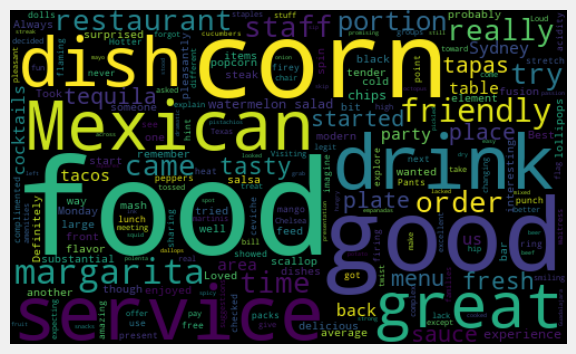

In [10]:
# Concatenate all comments into a single string
try:
    allWords = ' '.join([cmts for cmts in df['Comments']])

    # Create a WordCloud object
    wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allWords)

    # Plot the WordCloud
    plt.imshow(wordCloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()
except:
    print('Wrong Link!!!')


In [11]:
#Create a function compute the negative, neutral and positive analysis
def getAnalysis (score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)

#Show the dataframe
df

,Comments,Subjectivity,Polarity,Analysis
0,The food is fresh and tasty. The scallop cevi...,0.537654,0.238272,Positive
1,The food and service here was really good. It...,0.500000,0.487500,Positive
2,Hotter than I imagine myself to be and firing ...,0.600000,0.466667,Positive
3,Visiting from Texas and decided to give this r...,0.585000,0.505333,Positive
4,Don't come here expecting legit Mexican food b...,0.460456,0.095765,Positive
5,"Great atmosphere, attentive service, solid mar...",0.687500,0.550000,Positive
6,Out of all the restaurants that I tried in Syd...,0.541443,0.402976,Positive
7,We came here on a Thursday night @ 5pm and by ...,0.389187,0.009524,Positive
8,Have been here twice and have absolutely loved...,0.596111,0.247465,Positive
9,I was pleasantly surprised at what a great job...,0.635714,0.178571,Positive


## Print all of the positive comments

In [338]:
# j=1
# sortedDF = df.sort_values(by=['Polarity']) 
# for i in range(0, sortedDF.shape[0]):
#     if(sortedDF ['Analysis'][i] == 'Positive'):
#         print(str(j)+') '+sortedDF [ 'Comments'][i])
#         print()
#         j = j+1

## Print the negative comments

In [339]:
# j = 1
# sortedDF = df.sort_values(by='Polarity', ascending=False)  # Corrected the sort order
# for i in range(0, sortedDF.shape[0]):
#     if sortedDF['Analysis'].iloc[i] == 'Negative':  # Changed the syntax for accessing DataFrame elements
#         print(str(j) + ') ' + sortedDF['Comments'].iloc[i])  # Adjusted column name
#         print()
#         j = j + 1

## Get percentage of positive comment

In [12]:
# Get the percentage of positive comments
try:
    pcomments = df[df['Analysis'] == 'Positive'] 
    pcomments = pcomments['Comments']  

    positive_percentage = round((pcomments.shape[0] / df.shape[0]) * 100, 1) 

    print(f"Percentage of positive comments: {positive_percentage}")
except:
    positive_percentage=0
    print(f"Percentage of positive comments: {positive_percentage}")
    

Percentage of positive comments: 100.0


## Get percentage of negative comment

In [13]:
try:
    pcomments = df[df['Analysis'] == 'Negative']  # Corrected the syntax for filtering
    pcomments = pcomments['Comments']  # Adjusted column name

    negative_percentage = round((pcomments.shape[0] / df.shape[0]) * 100, 1)  # Fixed the syntax for rounding and percentage calculation

    print(f"Percentage of negative comments: {negative_percentage}")
except:
    negative_percentage = 0
    print(f"Percentage of negative comments: {negative_percentage}")

Percentage of negative comments: 0.0


In [14]:
try:
    pcomments = df[df['Analysis'] == 'Neutral']  # Corrected the syntax for filtering
    pcomments = pcomments['Comments']  # Adjusted column name

    neutral_percentage = round((pcomments.shape[0] / df.shape[0]) * 100, 1)  # Fixed the syntax for rounding and percentage calculation

    print(f"Percentage of Neutral sentiment: {neutral_percentage}")
except:
    neutral_percentage=0
    print(f"Percentage of Neutral sentiment: {neutral_percentage}")

Percentage of Neutral sentiment: 0.0


In [15]:
score=int((int(neutral_percentage/2)+positive_percentage)/10)
score

10

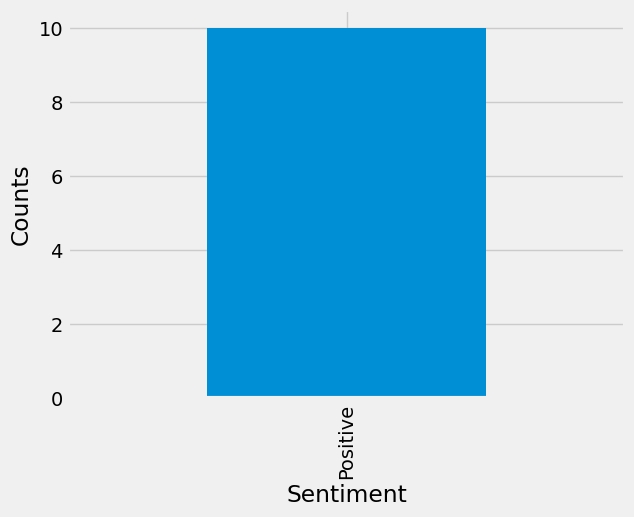

In [16]:
#Show the value counts
try:
    
    df['Analysis'].value_counts()

    #plot and visualize the counts plt.title('Sentiment Analysis')
    plt.xlabel('Sentiment')
    plt.ylabel('Counts')
    df['Analysis'].value_counts().plot(kind='bar')

    plt.show()
except:
    print('No data Available')

# Wikipedia web Scrapping

In [46]:
wiki_url="https://en.wikipedia.org/wiki/Yelp"
wiki = requests.get(wiki_url)
wiki_comments = BeautifulSoup(wiki.text, 'html.parser')
wiki_comments = wiki_comments.get_text(strip=True)


In [47]:
wiki_comments=re.sub(r'\[\d+\]',"", wiki_comments)
wiki_comments = re.sub(r'\([^)]*\)', '', wiki_comments)
wiki_comments=re.sub (r'\[\w+\]',"",wiki_comments)
wiki_comments=re.sub ('[0-9]+',"", wiki_comments)
cleanTxt(wiki_comments)


'Yelp - WikipediaJump to contentMain menuMain menumove to sidebarhideNavigationMain pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonateContributeHelpLearn to editCommunity portalRecent changesUpload fileLanguagesLanguage links are at the top of the page across from the title.SearchSearchCreate accountLog inPersonal toolsCreate accountLog inPages for logged out editorslearn moreContributionsTalkContentsmove to sidebarhideCompany history Toggle Company history  subsection.Origins .Private company .Public entity FeaturesToggle Features subsection.Features for businessesRelationship with businessesControversy and litigationToggle Controversy and litigation subsection.Astroturfing.Alleged unfair business practices.Political expression and politically motivated ratings.Litigation over review content.Business Insider Investigation.“Elite” reviewers Selling ReviewsCommunitySee alsoReferencesExternal linksToggle the table of contentsYelp languagesالعربيةتۆرکجهDeutschفارسیFra

In [48]:
def is_english(sentence):
    lang, _ = langid.classify(sentence)
    return lang == 'en'

# Split the text into sentences
sentences = re.split(r'(?<=[.!?])\s+', wiki_comments)

# Filter out non-English sentences
english_sentences = [sentence.strip() for sentence in sentences if is_english(sentence)]

# Join the English sentences back into a string
english_text = ' '.join(english_sentences)


In [49]:
from nltk.tokenize import sent_tokenize


In [50]:
sentence=sent_tokenize(english_text)

len(sentence)

347

In [51]:
#sentence

In [52]:
#Create a dataframe with a column called comments
df = pd.DataFrame({'Wiki Comments': sentence})

#Show the first 5 rows of data
df.head()

,Wiki Comments
0,"For other uses, seeYelp .Yelp Inc.ScreenshotYe..."
1,"billion Total equityUS$ million Employees, URL..."
2,"It also operates Yelp Guest Manager, atable re..."
3,"It is headquartered inSan Francisco, Californi..."
4,It has since become one of the leading sources...


In [53]:
#Download the file as Excel
df.to_excel('wikipedia_file.xlsx', index=False)


In [54]:
df[ 'Subjectivity']= df['Wiki Comments'].apply(getSubjectivity) 
df['Polarity']= df['Wiki Comments'].apply(getPolarity)

#Show the new dataframe with the new columns

df.head()

,Wiki Comments,Subjectivity,Polarity
0,"For other uses, seeYelp .Yelp Inc.ScreenshotYe...",0.1875,-0.0625
1,"billion Total equityUS$ million Employees, URL...",0.3750,0.0000
2,"It also operates Yelp Guest Manager, atable re...",0.0000,0.0000
3,"It is headquartered inSan Francisco, Californi...",0.0000,0.0000
4,It has since become one of the leading sources...,0.0500,0.0000


In [55]:
df['Analysis'] = df['Polarity'].apply(getAnalysis)
#df

In [56]:
# Get the percentage of positive sentiments
try:
    pcomments = df[df['Analysis'] == 'Positive']  # Corrected the syntax for filtering
    pcomments = pcomments['Wiki Comments']  # Adjusted column name

    wiki_positive_percentage = round((pcomments.shape[0] / df.shape[0]) * 100, 1)  # Fixed the syntax for rounding and percentage calculation

    print(f"Percentage of positive sentiment: {wiki_positive_percentage}")
except:
    wiki_positive_percentage=0
    print(f"Percentage of positive sentiment: {wiki_positive_percentage}")

Percentage of positive sentiment: 42.4


In [57]:
try:
    pcomments = df[df['Analysis'] == 'Negative']  # Corrected the syntax for filtering
    pcomments = pcomments['Wiki Comments']  # Adjusted column name

    wiki_negative_percentage = round((pcomments.shape[0] / df.shape[0]) * 100, 1)  # Fixed the syntax for rounding and percentage calculation

    print(f"Percentage of negative sentiment: {wiki_negative_percentage}")
except:
    wiki_negative_percentage=0
    print(f"Percentage of negative sentiment: {wiki_negative_percentage}")
    

Percentage of negative sentiment: 8.9


In [58]:
try:
    pcomments = df[df['Analysis'] == 'Neutral']  # Corrected the syntax for filtering
    pcomments = pcomments['Wiki Comments']  # Adjusted column name

    wiki_neutral_percentage = round((pcomments.shape[0] / df.shape[0]) * 100, 1)  # Fixed the syntax for rounding and percentage calculation

    print(f"Percentage of Neutral sentiment: {wiki_neutral_percentage}")
except:
    print(f"Percentage of Neutral sentiment: {wiki_neutral_percentage}")
    

Percentage of Neutral sentiment: 48.7


In [59]:
#Score out of 10
score2=int((int(wiki_neutral_percentage/2)+wiki_positive_percentage)/10)
score2


6

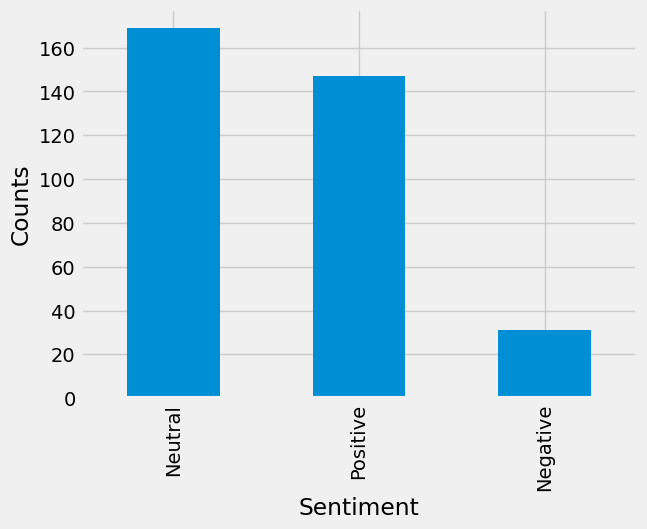

In [60]:
#Show the value counts
try:
    
    df['Analysis'].value_counts()

    #plot and visualize the counts plt.title('Sentiment Analysis')
    plt.xlabel('Sentiment')
    plt.ylabel('Counts')
    df['Analysis'].value_counts().plot(kind='bar')
    plt.show()
except:
    print("No data Available !!")

# Using Tweeter

In [61]:
from ntscraper import Nitter

scraper = Nitter()


Testing instances: 100%|███████████████████████████████████████████████████████████████| 28/28 [01:20<00:00,  2.87s/it]


In [84]:
search_term = input("Enter the search term: ")
tweet_mode = input("Enter the mode (term/hashtag): ")
results = scraper.get_tweets(search_term, mode=tweet_mode,number=110)


# results = scraper.get_tweets("unacademy", mode='hashtag',number=110)

Enter the search term: Yelp
Enter the mode (term/hashtag): term
18-Nov-23 01:55:06 - No instance specified, using random instance https://nitter.projectsegfau.lt
18-Nov-23 01:55:15 - Current stats for Yelp: 15 tweets, 0 threads...
18-Nov-23 01:55:19 - Current stats for Yelp: 26 tweets, 0 threads...
18-Nov-23 01:55:27 - Current stats for Yelp: 39 tweets, 0 threads...
18-Nov-23 01:55:32 - Current stats for Yelp: 55 tweets, 0 threads...
18-Nov-23 01:55:37 - Current stats for Yelp: 67 tweets, 0 threads...
18-Nov-23 01:55:43 - Current stats for Yelp: 84 tweets, 0 threads...
18-Nov-23 01:55:49 - Current stats for Yelp: 96 tweets, 0 threads...
18-Nov-23 01:55:56 - Current stats for Yelp: 110 tweets, 0 threads...


In [63]:
# results

In [64]:
final_tweets = []

for tweet in results['tweets']:
    data = [tweet['link'], tweet['text'], tweet['date'], tweet['stats']['likes'], tweet['stats']['comments']] 
    final_tweets.append(data)
    

In [65]:
# final_tweets

In [66]:
data=pd.DataFrame(final_tweets, columns =['link', 'text', 'date', 'No_of_Likes', 'No_of_tweets'])

In [67]:
data.head()

,link,text,date,No_of_Likes,No_of_tweets
0,https://twitter.com/BarnardRich/status/1725524...,Check out Jenn E.'s review of Intoxalock Ignit...,"Nov 17, 2023 · 2:42 PM UTC",0,0
1,https://twitter.com/CyclopsGavin/status/172552...,Lets fly with this quality chain. Better than ...,"Nov 17, 2023 · 2:33 PM UTC",0,0
2,https://twitter.com/Law360/status/172552173315...,An economics expert closed out the government'...,"Nov 17, 2023 · 2:30 PM UTC",0,0
3,https://twitter.com/DR_fore/status/17255184844...,🐻🐱🐰🍑(슬쩍..,"Nov 17, 2023 · 2:17 PM UTC",212,0
4,https://twitter.com/chororong_pic/status/17255...,231117 Unfinished 팬싸인회 프리뷰 이 기여미야ㅠㅠ,"Nov 17, 2023 · 2:20 PM UTC",66,0


In [68]:
#Download the file as Excel
df.to_excel('tweets.xlsx', index=False)

In [69]:
#remove few colomns
columns_to_remove=['link','date','No_of_Likes','No_of_tweets']
df = data.drop(columns=columns_to_remove)

In [70]:
df.head()

,text
0,Check out Jenn E.'s review of Intoxalock Ignit...
1,Lets fly with this quality chain. Better than ...
2,An economics expert closed out the government'...
3,🐻🐱🐰🍑(슬쩍..
4,231117 Unfinished 팬싸인회 프리뷰 이 기여미야ㅠㅠ


In [71]:
##Cleaning all text
#remove emojies
def remove_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F700-\U0001F77F"  # alchemical symbols
                               u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                               u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                               u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                               u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                               u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                               u"\U00002702-\U000027B0"  # Dingbats
                               u"\U000024C2-\U0001F251" 
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

df['text']=df['text'].apply(cleanTxt)
df['text']=df['text'].apply(remove_emojis)
# df['text']=df['text'].apply(is_english)

In [387]:
df.head()

,text
0,Haudion Pokemon
1,The yelp I let out while I was teaching my 6th...
2,Thank you to you both! I’m going in a couple w...
3,"fwiw, I had an enjoyable first visit w/ the m..."
4,Stocks failing to make a new 52-week high toda...


In [72]:
df[ 'Subjectivity']= df['text'].apply(getSubjectivity) 
df['Polarity']= df['text'].apply(getPolarity)

#Show the new dataframe with the new columns

df.head()

,text,Subjectivity,Polarity
0,Check out Jenn E.'s review of Intoxalock Ignit...,0.000000,0.000000
1,Lets fly with this quality chain. Better than ...,0.725000,0.481250
2,An economics expert closed out the government'...,0.372619,0.080952
3,(..,0.000000,0.000000
4,231117 Unfinished,0.000000,0.000000


In [73]:
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df.head()

,text,Subjectivity,Polarity,Analysis
0,Check out Jenn E.'s review of Intoxalock Ignit...,0.000000,0.000000,Neutral
1,Lets fly with this quality chain. Better than ...,0.725000,0.481250,Positive
2,An economics expert closed out the government'...,0.372619,0.080952,Positive
3,(..,0.000000,0.000000,Neutral
4,231117 Unfinished,0.000000,0.000000,Neutral


In [74]:
# Get the percentage of positive sentiments

pcomments = df[df['Analysis'] == 'Positive']  # Corrected the syntax for filtering
pcomments = pcomments['text']  # Adjusted column name

tweet_positive_percentage = round((pcomments.shape[0] / df.shape[0]) * 100, 1)  # Fixed the syntax for rounding and percentage calculation

print(f"Percentage of positive sentiment: {tweet_positive_percentage}")

Percentage of positive sentiment: 23.6


In [75]:
#Percentage of Negative sentiment

pcomments = df[df['Analysis'] == 'Negative']  # Corrected the syntax for filtering
pcomments = pcomments['text']  # Adjusted column name

tweet_negative_percentage = round((pcomments.shape[0] / df.shape[0]) * 100, 1)  # Fixed the syntax for rounding and percentage calculation

print(f"Percentage of negative sentiment: {tweet_negative_percentage}")

Percentage of negative sentiment: 10.9


In [76]:
pcomments = df[df['Analysis'] == 'Neutral']  # Corrected the syntax for filtering
pcomments = pcomments['text']  # Adjusted column name

tweet_neutral_percentage = round((pcomments.shape[0] / df.shape[0]) * 100, 1)  # Fixed the syntax for rounding and percentage calculation

print(f"Percentage of Neutral sentiment: {tweet_neutral_percentage}")

Percentage of Neutral sentiment: 65.5


In [77]:
score3=int((int(tweet_neutral_percentage/2)+tweet_positive_percentage)/10)
score3

5

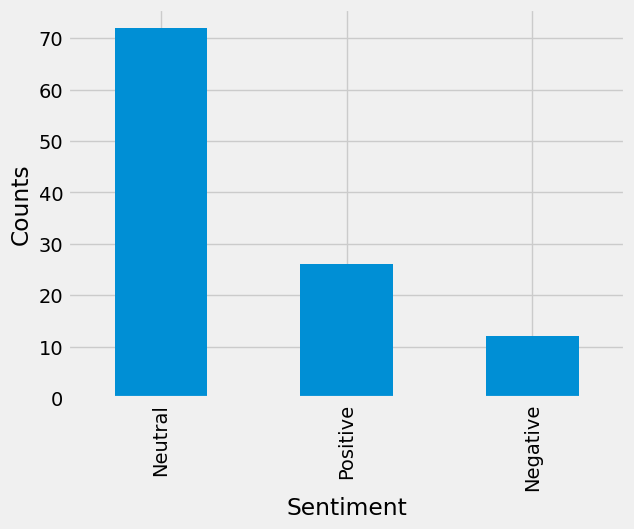

In [78]:
#Show the value counts

df['Analysis'].value_counts()

#plot and visualize the counts plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

# Sending Emails

In [83]:
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
from email.mime.base import MIMEBase
from email import encoders

# Setup port number and server name

smtp_port = 587                 # Standard secure SMTP port
smtp_server = "smtp.gmail.com"  # Google SMTP Server

# Set up the email lists
email_from = "arindamg593@gmail.com"
email_list = []
input_str = input("Enter email where you want to send data: ")
email_list.append(input_str)

# Define the password 
pswd = "ofmk dssm pxgr qvod" 


# name the email subject
subject = "Sentiment Analysis"



# Define the email function (dont call it email!)
def send_emails(email_list):

    for person in email_list:

        # Make the body of the email
        body = result_text = f"""
                By analyzing this ({web_url}), we found:
                {positive_percentage}% of users gave positive comments.
                {negative_percentage}% of users gave negative comments.
                {neutral_percentage}% of users gave neutral comments.
                So, on a scale of 1-10, we give it a score of {score}.

                You will find the entire comments file attached to this email as web_file.xlsx.
                
                
                By analyzing this wikipedia url({wiki_url}), we found:
                {wiki_positive_percentage}% of users gave positive comments.
                {wiki_negative_percentage}% of users gave negative comments.
                {wiki_neutral_percentage}% of users gave neutral comments.
                So, on a scale of 1-10, we give it a score of {score2}.

                You will find the entire comments file attached to this email as wikipedia_file.xlsx.
                
                
                By analyzing all the tweets of {search_term} we found:
                {tweet_positive_percentage}% of users gave positive comments.
                {tweet_negative_percentage}% of users gave negative comments.
                {tweet_neutral_percentage}% of users gave neutral comments.
                So, on a scale of 1-10, we give it a score of {score3}.

                You will find the entire comments file attached to this email as tweet.xlsx.
                """


        # make a MIME object to define parts of the email
        msg = MIMEMultipart()
        msg['From'] = email_from
        msg['To'] = person
        msg['Subject'] = subject

        # Attach the body of the message
        msg.attach(MIMEText(body, 'plain'))

        # Define the file to attach
        filename1 = "wikipedia_file.xlsx"
        filename2 = "web_file.xlsx"
        filename3 = "tweets.xlsx"

        # Open the file in python as a binary
        attachment1= open(filename1, 'rb')  # r for read and b for binary
        attachment2= open(filename2, 'rb')
        attachment3= open(filename3, 'rb')

        # Encode as base 64 -1
        attachment_package = MIMEBase('application', 'octet-stream')
        attachment_package.set_payload((attachment1).read())
        encoders.encode_base64(attachment_package)
        attachment_package.add_header('Content-Disposition', "attachment; filename= " + filename1)
        msg.attach(attachment_package)
        
         # Encode as base 64 -2
        attachment_package = MIMEBase('application', 'octet-stream')
        attachment_package.set_payload((attachment2).read())
        encoders.encode_base64(attachment_package)
        attachment_package.add_header('Content-Disposition', "attachment; filename= " + filename2)
        msg.attach(attachment_package)
        
         # Encode as base 64 -3
        attachment_package = MIMEBase('application', 'octet-stream')
        attachment_package.set_payload((attachment3).read())
        encoders.encode_base64(attachment_package)
        attachment_package.add_header('Content-Disposition', "attachment; filename= " + filename3)
        msg.attach(attachment_package)

        # Cast as string
        text = msg.as_string()

        # Connect with the server
        print("Connecting to server...")
        TIE_server = smtplib.SMTP(smtp_server, smtp_port)
        TIE_server.starttls()
        TIE_server.login(email_from, pswd)
        print("Succesfully connected to server")
        print()


        # Send emails to "person" as list is iterated
        print(f"Sending email to: {person}...")
        TIE_server.sendmail(email_from, person, text)
        print(f"Email sent to: {person}")
        print()

    # Close the port
    TIE_server.quit()


# Run the function
send_emails(email_list)

Enter email where you want to send data: sesin77228@nexxterp.com
Connecting to server...
Succesfully connected to server

Sending email to: sesin77228@nexxterp.com...
Email sent to: sesin77228@nexxterp.com

